### Importing the libraries

In [31]:
import os
from glob import glob
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import numpy as np

### Splitting Data

In [ ]:
# Tạo thư mục lưu trữ trước khi chia
INPUT_DATA = "F:/khanh_covid/root_img"
OUTPUT_DATA = "F:/khanh_covid/split_data"

# tạo các biến thư mục chứa tập train, val, test
TRAIN_PATH = os.path.join(OUTPUT_DATA, "train")
VAL_PATH = os.path.join(OUTPUT_DATA, "val")
TEST_PATH = os.path.join(OUTPUT_DATA, "test")


In [26]:
# CHIA DỮ LIỆU
# tỉ lệ chia 70-20-10 
# 70% cho tập train
# 20% cho tập val
# 10% cho tập test

VAL_PERCENT = 0.2
TEST_PERCENT = 0.1
def move_img(list_img_paths, target_folder, class_name):
    for img in list_img_paths:
        shutil.move(img, os.path.join(target_folder, class_name, img.split('\\')[-1]))


for class_name in os.listdir(INPUT_DATA):
    class_path = os.path.join(INPUT_DATA, class_name)

    if os.path.isdir(class_path):
        img_paths = glob(os.path.join(class_path, "*.*"))
        
        for folder in [TRAIN_PATH, VAL_PATH, TEST_PATH]:
            os.makedirs(os.path.join(folder, class_name), exist_ok=True)

        train_img_paths, val_img_paths = train_test_split(img_paths, test_size=VAL_PERCENT, random_state=42)
        train_img_paths, test_img_paths = train_test_split(train_img_paths, test_size=TEST_PERCENT, random_state=42)

        move_img(train_img_paths, TRAIN_PATH, class_name)
        move_img(val_img_paths, VAL_PATH, class_name)
        move_img(test_img_paths, TEST_PATH, class_name)
    


### Statistical Data

In [ ]:
##################### THỐNG KÊ DỮ LIỆU ############################
OUTPUT_DATA = "F:/khanh_covid/split_data"

# tạo path các thư mục train, val, test
train_dir = os.path.join(OUTPUT_DATA, "train/")
val_dir = os.path.join(OUTPUT_DATA, "val/")
test_dir = os.path.join(OUTPUT_DATA, "test/")

train_statistics = []
val_statistics = []
test_statistics = []
total_statistics = [{}, {}, {}]

def statistic(class_name, folder, id):
    total_statistics[id][class_name] = len(glob(os.path.join(folder, class_name, '*.*')))

for id, folder in enumerate([train_dir, val_dir, test_dir], start=0):
    for class_name in os.listdir(folder):
        statistic(class_name, folder, id)

total_statistics

[{'covid': 2602, 'normal': 2448},
 {'covid': 724, 'normal': 680},
 {'covid': 290, 'normal': 272}]

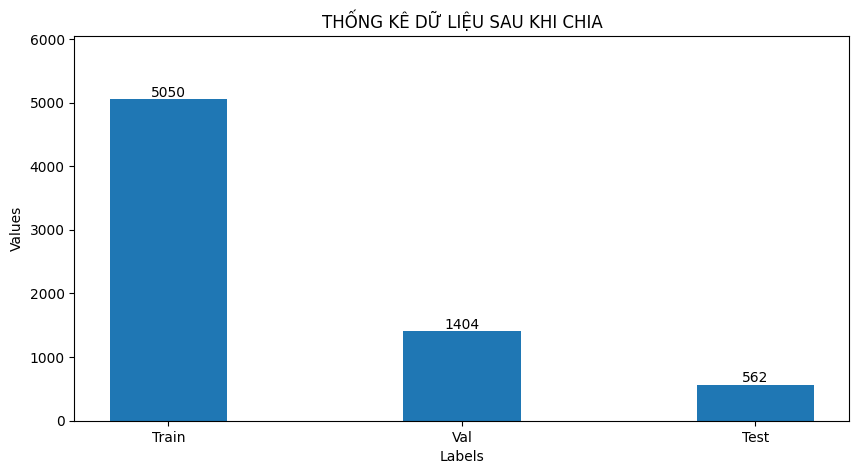

In [30]:
plt.figure(figsize=(10,5))
values = [sum(item.values()) for item in total_statistics]
position = [1,2,3]
labels = ['Train', 'Val', 'Test']
plt.bar(position, values, width=0.4)

# set text
for i, j in zip(position, values):
    plt.text(i,j, str(j), ha='center', va='bottom')

plt.title('THỐNG KÊ DỮ LIỆU SAU KHI CHIA')
plt.ylabel('Values')
plt.xlabel('Labels')
plt.xticks(position, labels)
plt.ylim(0,max(values)+1000)
plt.show()

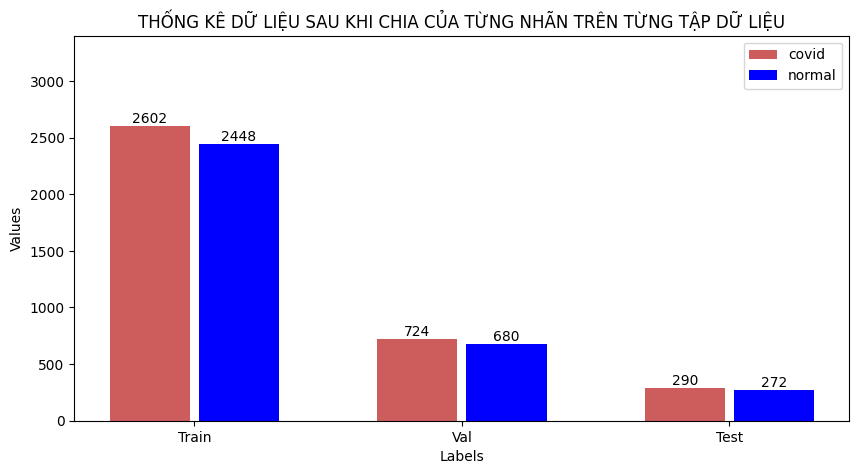

In [45]:
plt.figure(figsize=(10,5))

train_position = np.arange(start=1,stop=3)
val_position = np.arange(start=4,stop=6)
test_position = np.arange(start=7,stop=9)
position = [sum(train_position)/len(train_position), sum(val_position)/len(val_position), sum(test_position)/len(test_position)]
colors = ['indianred', 'blue'] 
labels = total_statistics[0].keys()

plt.bar(train_position, total_statistics[0].values(), width=0.9, color=colors, label=labels)
plt.bar(val_position, total_statistics[1].values(), width=0.9, color=colors)
plt.bar(test_position, total_statistics[2].values(), width=0.9, color=colors)

# set text 
# train
for i, j in zip(train_position, total_statistics[0].values()):
    plt.text(i,j, str(j), ha='center', va='bottom')

# val
for i, j in zip(val_position, total_statistics[1].values()):
    plt.text(i,j, str(j), ha='center', va='bottom')

# test
for i, j in zip(test_position, total_statistics[2].values()):
    plt.text(i,j, str(j), ha='center', va='bottom')

plt.title('THỐNG KÊ DỮ LIỆU SAU KHI CHIA CỦA TỪNG NHÃN TRÊN TỪNG TẬP DỮ LIỆU')
plt.ylabel('Values')
plt.xlabel('Labels')
plt.legend()
plt.xticks(position, ['Train', 'Val', 'Test'])
plt.ylim(0,3000+400)
plt.show()